# Ciência dos Dados - PROJETO 1

## Nicolas Barbosa Stegmann

## Título

# Introdução

   A Insegurança Alimentar é brevemente definida como falta de disponibilidade e acesso de pessoas a alimentos. A partir desta definição, o projeto aqui desenvolvido visa mapear a insegurança alimentar no Brasil e assim forncer uma resposta para a pergunta: A insegurança alimentar no Brasil é mais fortemente relacionada a renda da população ou a questões relacionadas à infraestrutura estatal?
   Para isso, foram utilizados a base de dados do PNAD domicílios tanto em 2009 e 2013, para que os dados obtidos fossem comparados e possibilitar a obtenção uma resposta mais sensível à pergunta que se propoem analisar.

# 1.0 Iniciando o Projeto: Filtrando as varíaveis

### 1.1 Definindo as variáveis importantes para a análise

Primeiramente, foi necessário estabelecer quais domicílios apresentam habitantes que passam por Insegurança Alimentar, e por isso foi criada as variáveis a seguir:

•	Pessoas que assinalaram que passam por qualquer tipo de insegurança alimentar: Usada para levantar o pessoal nacional de pessoas que passam por insegurança alimentar no brasil.

•	Pessoas que assinalaram que não passam por qualquer tipo de insegurança alimentar: Usada para levantar o pessoal nacional de pessoas que passam por insegurança alimentar no brasil.

Com o intuito analisar a localização geográfica da Insegurança Alimentar no Brasil, julgou-se útil o uso de variáveis que agrupassem as pessoas que se consideram em situação de Insegurança Alimentar em suas posições geográficas, para que dessa maneira fosse mais fácil a posterior análise da influência da renda sobre estas pessoas.
   
•	Região: Os estados brasileiros foram agrupados em regiões, para que a análise do cenário de insegurança seja feita em relação as regiões, e não apenas em relação aos estados.

•	Domicílios em zona rural: Agrupamento de todos domicílios em as áreas rurais da PNAD, utilizada para entender a dinâmica da insegurança alimentar nas zonas do brasil

•	Domicílios em zona urbana: Agrupamento de todas as áreas urbanas da PNAD, mesmo objetivo da variável zona rural.

Foram então criadas variáveis que facilitem a compreensão da dinâmica da renda domiciliar per-capta no Brasil, e por tanto foram utilizadas as seguintes variãveis:

•	Renda domiciliar per capita: Razão entre a renda domiciliar e o número de habitantes do domicílio.

•   Faixa da Renda domiciliar per-capta: Renda do domicílio em relação ao salário mínimo

Por último, a variável utilizada para compreender a dinâmica da infraestrutura estatal foi:

•  Forma de escoadouro do banheiro ou sanitário: usado para indicar o nível do saneamento básico

•  Destino do lixo domiciliar

### 1.2 Filtrando essas variáveis da base de dados da PNAD 2009

In [6]:
import pandas as pd
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
dados09 = pd.read_csv("DOM2009.csv",sep=",")

#Criando as variáveis

#Insegurança alimentar(2009)
dados09.loc[(dados09.V2103==1) | (dados09.V2105==1) | (dados09.V2107==1) | (dados09.V2109==1),'Insegurança_Alimentar'] = 'Sim'
dados09.loc[(dados09.V2103==3) & (dados09.V2105==3) & (dados09.V2107==3) & (dados09.V2109==3),'Insegurança_Alimentar'] = 'Não'

#Região(2009)
dados09.loc[(dados09.UF >= 10) & (dados09.UF < 20), "Região"] = "Norte"
dados09.loc[(dados09.UF >= 20) & (dados09.UF < 30), "Região"] = "Nordeste"
dados09.loc[(dados09.UF >= 30) & (dados09.UF < 40), "Região"] = "Sudeste"
dados09.loc[(dados09.UF >= 40) & (dados09.UF < 50), "Região"] = "Sul"
dados09.loc[(dados09.UF >= 50) & (dados09.UF < 60), "Região"] = "Centro-Oeste"

#Area do domicílio(2009)
dados09.loc[(dados09.V4105 <= 3), "Área_do_domicílio"] = "Urbana"
dados09.loc[(dados09.V4105 >= 4), "Área_do_domicílio"] = "Rural"

#Renda domiciliar percapta(2009) e excluindo os não aplicaveis
dados09.loc[(dados09.V4621 != 999999999999), "Renda"] = dados09.V4621

#Indicando que UF é variável categorica
dados09.UF = dados09.UF.astype("category")
dados09.UF.cat.categories=(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])

#Indicando que faixa de renda é categorica e eliminando os não aplicáveis(2009)
dados09.V4622 = dados09.V4622.astype("category")
dados09.V4622.cat.categories  =(["Sem rendimento","Até ¼ salário mínimo","Mais de ¼ até ½ salário mínimo", "Mais de ½ até 1 salário mínimo", "Mais de 1 até  2 salários mínimos", "Mais de  2 até  3 salários mínimos", "Mais de 3 até 5 salários mínimos", "Mais de 5 salários mínimos", "Sem declaração"])
dados09.loc[(dados09.V4622 != 99), "Faixa_de_Renda"] = dados09.V4622

#Definindo as médias da renda per-capta de cada região(2009)
renda_norte09 = dados09[(dados09.Região == "Norte")].Renda.mean()
renda_nordeste09 = dados09[(dados09.Região == "Nordeste")].Renda.mean()
renda_centro_oeste09= dados09[(dados09.Região == "Centro-Oeste")].Renda.mean()
renda_sudeste09 = dados09[(dados09.Região == "Sudeste")].Renda.mean()
renda_sul09 = dados09[(dados09.Região == "Sul")].Renda.mean()

#Forma de escoadouro do banheiro ou sanitário
dados09.V0217 = dados09.V0217.astype('category')
dados09.V0217.cat.categories = ('RedeColetora', 'FossaSeptica1', 'FossaSeptica2', 'FossaRud', 'Vala','Água', 'Outro')

#Criando um DataFrame com essas variáveis em 2009
colunas1 = dados09.loc[:,["UF", "Região", "Área_do_domicílio", "Insegurança_Alimentar","V0217", "Renda", "Faixa_de_Renda"]].dropna(subset=("UF","Região","Área_do_domicílio","Insegurança_Alimentar","Renda", "Faixa_de_Renda", "V0217"))
colunas1.columns = ["Estado", "Região", "Área_do_domicílio", "Insegurança_Alimentar","Forma de escoadouro do banheiro ou sanitário", "Renda", "Faixa_de_Renda"]

colunas1.head(5)

,Estado,Região,Área_do_domicílio,Insegurança_Alimentar,Forma de escoadouro do banheiro ou sanitário,Renda,Faixa_de_Renda
3,Rondônia,Norte,Urbana,Não,FossaRud,1053.0,Mais de 2 até 3 salários mínimos
4,Rondônia,Norte,Urbana,Não,FossaRud,930.0,Mais de 1 até 2 salários mínimos
6,Rondônia,Norte,Urbana,Não,FossaRud,232.0,Mais de ¼ até ½ salário mínimo
7,Rondônia,Norte,Urbana,Não,FossaRud,248.0,Mais de ½ até 1 salário mínimo
8,Rondônia,Norte,Urbana,Sim,FossaRud,59.0,Até ¼ salário mínimo


### 1.3 Filtrando essas variáveis da PNAD 2013

In [3]:
dados = pd.read_csv('DOM2013.csv',sep=',')

#Insegurança alimentar(2013)
dados.loc[(dados.V2103==1) | (dados.V2105==1) | (dados.V2107==1) | (dados.V2109==1),'Insegurança_Alimentar'] = 'Sim'
dados.loc[(dados.V2103==3) & (dados.V2105==3) & (dados.V2107==3) & (dados.V2109==3),'Insegurança_Alimentar'] = 'Não'

#Região(2013)
dados.loc[(dados.UF >= 10) & (dados.UF < 20), "Região"] = "Norte"
dados.loc[(dados.UF >= 20) & (dados.UF < 30), "Região"] = "Nordeste"
dados.loc[(dados.UF >= 30) & (dados.UF < 40), "Região"] = "Sudeste"
dados.loc[(dados.UF >= 40) & (dados.UF < 50), "Região"] = "Sul"
dados.loc[(dados.UF >= 50) & (dados.UF < 60), "Região"] = "Centro-Oeste"

#Area do domicílio(2013)
dados.loc[(dados.V4105 <= 3), "Área_do_domicílio"] = "Urbana"
dados.loc[(dados.V4105 >= 4), "Área_do_domicílio"] = "Rural"


#Renda domiciliar per-capta(2013)
dados.loc[(dados.V4621 != 999999999999), "Renda"] = dados.V4621


#Definindo Uf como variável categórica
dados.UF = dados.UF.astype("category")
dados.UF.cat.categories=(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])

#Média da renda domiciliar per-capta das regiões em 2013
renda_norte13 = dados[(dados.Região == "Norte")].Renda.mean()
renda_nordeste13 = dados[(dados.Região == "Nordeste")].Renda.mean()
renda_centro_oeste13 = dados[(dados.Região == "Centro-Oeste")].Renda.mean()
renda_sudeste13 = dados[(dados.Região == "Sudeste")].Renda.mean()
renda_sul13 = dados[(dados.Região == "Sul")].Renda.mean()

#Criando um DataFrame com essas variáveis em 2013
colunas = dados.loc[:,["UF", "Região", "Área_do_domicílio", "Insegurança_Alimentar","Renda"]].dropna(subset=("UF","Região","Área_do_domicílio","Insegurança_Alimentar","Renda"))
colunas.columns = ["Estado", "Região", "Área_do_domicílio", "Insegurança_Alimentar","Renda"]
colunas.tail(5)

,Estado,Região,Área_do_domicílio,Insegurança_Alimentar,Renda
148690,Distrito Federal,Centro-Oeste,Urbana,Sim,516.0
148692,Distrito Federal,Centro-Oeste,Urbana,Sim,800.0
148693,Distrito Federal,Centro-Oeste,Urbana,Sim,100.0
148694,Distrito Federal,Centro-Oeste,Urbana,Não,387.0
148695,Distrito Federal,Centro-Oeste,Urbana,Sim,400.0


# 2.0 Obtendo o indicador guia do projeto

Para iniciar a análise a respeito da sobreponderância da renda às demais variaveis em relação a causa da Insegurança alimentar, é necessário averiguar se realmente há uma correlação entre a renda e a Insegurança Alimentar. Para isso foi gerado o seguinte gráfico:

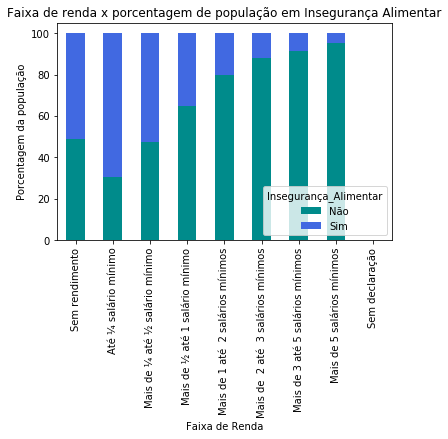

In [4]:
a = (pd.crosstab((dados09.V4622),(colunas1.Insegurança_Alimentar), normalize = "index")*100).plot(kind="bar", stacked = True, title = "Faixa de renda x porcentagem de população em Insegurança Alimentar", color = ["darkcyan", "royalblue"])
a.set_xlabel("Faixa de Renda")
a.set_ylabel("Porcentagem da população")

A partir do gráfico, é possivel concluir que a medida que a renda aumenta, a situação de Insegurança Alimentar diminui. Portanto, a correlação entre essas duas variáveis é verdadeira. Para dar a resposta a qual este projeto se propoem, cabe agora responder se há ou não alguma outra variável que afete a situação de insegurança alimentar no Brasil. 

# 3.0 Mapeamento das zonas de Insegurança alimentar

 Com esse intúito, esta parte do projeto busca mapear a insegurança alimentar no Brasil, e assim comparar a situação deste índice em cada local, para então encontrar uma resposta que sirva como conclusão do projeto. Tal procedimento se repetirá para os dados de 2013.

Para obtermos o primeiro panorama a respeito da Insegurança Alimentar no Brail, foram gerados gráficos a respeito da localização regional deste índice no Brasil 

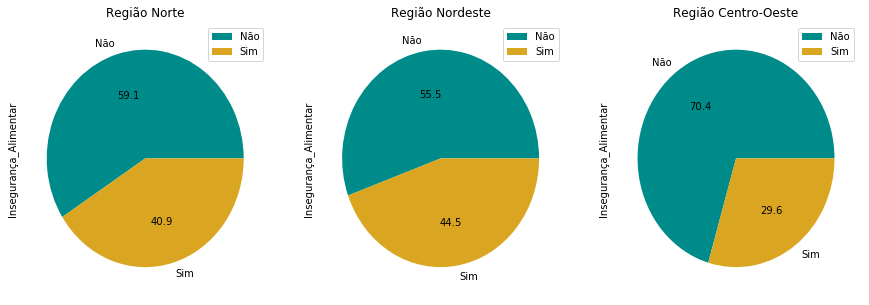

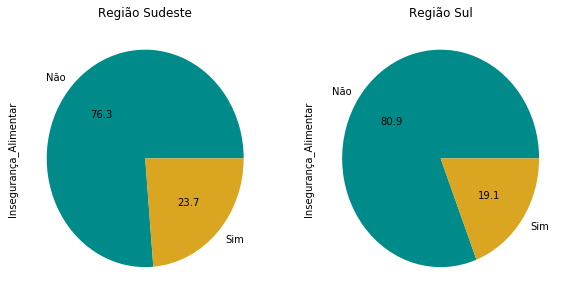

In [13]:
#análise da localização geográfica por região do Brasil
fig=plt.figure(figsize=(15,5))

plt.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

plt.subplot(131)
gregiaoN_IA = colunas1[colunas1.Região == "Norte"].Insegurança_Alimentar.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=True, colors =["darkcyan", "goldenrod"])
plt.title("Região Norte")

plt.subplot(132)
gregiaoNE_IA = colunas1[colunas1.Região == "Nordeste"].Insegurança_Alimentar.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=True, colors =["darkcyan", "goldenrod"])
plt.title("Região Nordeste")

plt.subplot(133)
gregiaoCO_IA = colunas1[colunas1.Região == "Centro-Oeste"].Insegurança_Alimentar.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=True, colors =["darkcyan", "goldenrod"])
plt.title("Região Centro-Oeste")

fig=plt.figure(figsize=(15,5))

plt.subplot(131)
gregiaoSE_IA = colunas1[colunas1.Região == "Sudeste"].Insegurança_Alimentar.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=False, colors =["darkcyan", "goldenrod"])
plt.title("Região Sudeste")

plt.subplot(132)
gregiaoS_IA = colunas1[colunas1.Região == "Sul"].Insegurança_Alimentar.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=False, colors =["darkcyan", "goldenrod"])
plt.title("Região Sul")

plt.show()

A Insegurança alimentar está, portanto, distribuida da seguinte maneira:

* Norte: 40.9% da população está em insegurança alimentar
* Nordeste: 44.5% da população está em insegurança alimentar
* Centro-Oeste: 29.6% da população está em insegurança alimentar
* Sudeste: 23.7% da população está em insegurança alimentar
* Sul: 19.1% da população está em insegurança alimentar

Portanto, os estados que apresentam índices maiores de insegurança alimentar são os estados do Norte e do Nordeste.

A fim de aprofundar o entendimento sobre como o índice está distribuido no território nacional, foram então gerados gráficos que relacionassem a zona do domicílio dentro da região com a insegurança alimentar:

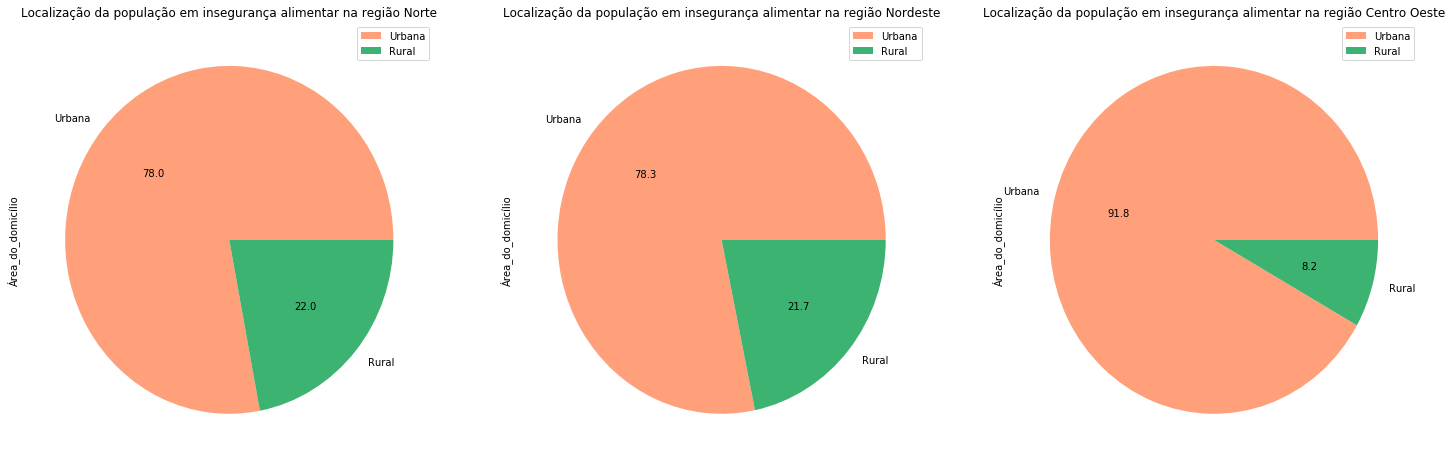

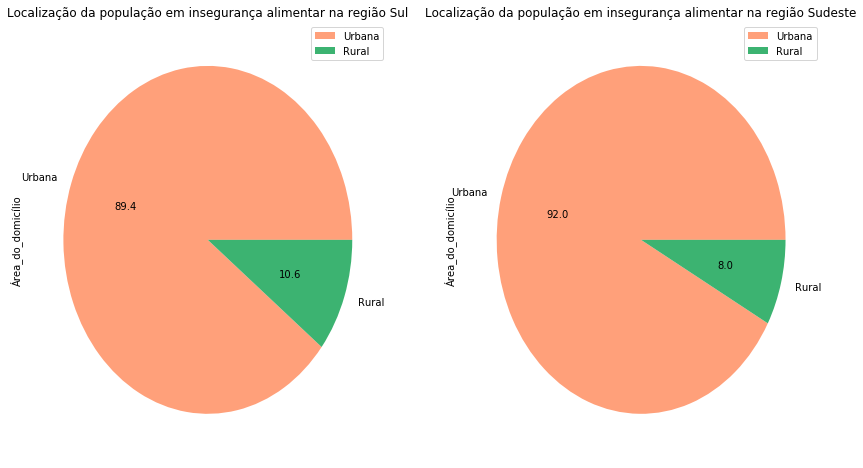

In [16]:
#análise da area da insegurança alimentar
fig=plt.figure(figsize=(25,8))

#localização da insegurança alimentar na região Norte
plt.subplot(131)
colunas1[(colunas1.Região == "Norte") & (colunas1.Insegurança_Alimentar == "Sim")].Área_do_domicílio.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=True, colors = ["lightsalmon", "mediumseagreen"])
plt.title("Localização da população em insegurança alimentar na região Norte")

#localização da insegurança alimentar na região Nordeste
plt.subplot(132)
plt.title("Localização da população em insegurança alimentar na região Nordeste")
colunas1[(colunas1.Região == "Nordeste") & (colunas1.Insegurança_Alimentar == "Sim")].Área_do_domicílio.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=True, colors = ["lightsalmon", "mediumseagreen"])

#localização da insegurança alimentar na região Centro Oeste
plt.subplot(133)
plt.title("Localização da população em insegurança alimentar na região Centro Oeste")
colunas1[(colunas1.Região == "Centro-Oeste") & (colunas1.Insegurança_Alimentar == "Sim")].Área_do_domicílio.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=True, colors = ["lightsalmon", "mediumseagreen"])

fig = plt.figure(figsize=(22,8))

#localização da insegurança alimentar na região Sul
plt.subplot(131)
colunas1[(colunas1.Região == "Sul") & (colunas1.Insegurança_Alimentar == "Sim")].Área_do_domicílio.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=True, colors = ["lightsalmon", "mediumseagreen"])
plt.title("Localização da população em insegurança alimentar na região Sul")

#localização da insegurança alimentar na região Nordeste
plt.subplot(132)
colunas1[(colunas1.Região == "Sudeste") & (colunas1.Insegurança_Alimentar == "Sim")].Área_do_domicílio.value_counts(True).plot(kind="pie", autopct="%0.1f",legend=True, colors = ["lightsalmon", "mediumseagreen"])
plt.title("Localização da população em insegurança alimentar na região Sudeste")

Os gráficos acima apontam a porcentagem absoluta de população em insegurança alimentar em cada zona por região, ou seja, qual a porcentagem da insegurança alimentar que está localizado nas zonas urbanas e rural. A partir da análise chegou-se na seguinte conclusão:
* Norte: 78% da insegurança alimentar está localizada na zona urbana, e 22% na zona rural
* Nordeste: 78.3% da insegurança alimentar está localiza da na zona urbana, e 21.7% na zona rural
* Centro-Oeste: 91.8% da insegurança alimentar está localizada na zona urbana, e 9.2% na zona rural
* Sul: 89.4% da insegurança alimentar está localizada na zona urbana, e 10.6% na zona rural
* Sudeste: 92% da insegurança alimentar está localizada na zona urbana, e 8% na zona rual

Os dados acima, entretanto, não dão o panorama em relação a porcentagem de pessoas que estão em insegurança alimentar dentro de cada zona. Assim, não é possível averiguar se há, relativamente, mais pessoas na zona urbana ou rural que estão em insegurança alimentar. Para isso, foi gerado o gráfico abaixo:

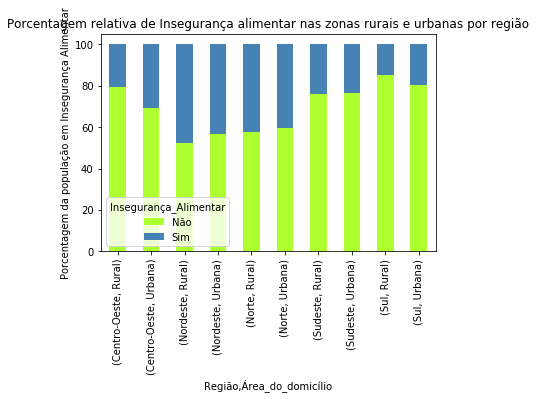

In [7]:
#relativização da análise por zona
tabela2 = (pd.crosstab([(dados09.Região),(dados09.Área_do_domicílio)], dados09.Insegurança_Alimentar, normalize="index")*100).plot(kind="bar", title = "Porcentagem relativa de Insegurança alimentar nas zonas rurais e urbanas por região",stacked = True, color = ["greenyellow", "steelblue"]).set_ylabel("Porcentagem da população em Insegurança Alimentar")
tabela2

Com o objetivo de resumir todos os dados analisados até agora, para realizar uma análise de forma mais concisa, foram então gerados os gráficos a seguir:

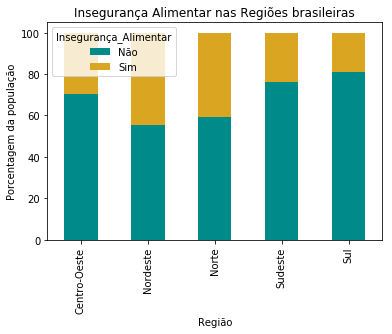

In [8]:
fig=plt.figure(figsize=(15,5))

#resumo análise por região
tabela1 = (pd.crosstab((colunas1.Região),(colunas1.Insegurança_Alimentar), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="Insegurança Alimentar nas Regiões brasileiras", color =["darkcyan", "goldenrod"]).set_ylabel("Porcentagem da população")

O gráfico acima é apenas um resumo de todos os gráficos de pizza da primeira parte. Ele nos da um panorama da porcentagem da populaçao em cada região que está em insegurança alimentar.
#### É importante notar que a insegurança alimentar nas regições está destribuida, em ordem crescente, na seguinte maneira: Sul, Sudeste, Centro-Oeste, Norte e Nordeste
Já os gráficos abaixo se preocupam em resumir a segunda parte do levantamento de dados, ou seja, é o resumo da consdição de insegurança alimentar por zona em cada região.

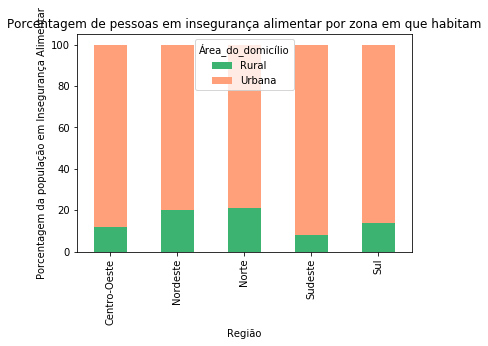

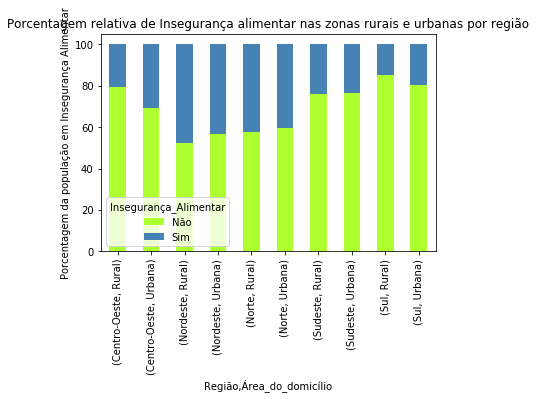

In [9]:
#resumo análise por zona
x = colunas1[colunas1.Insegurança_Alimentar=="Sim"]
tabela2 = (pd.crosstab((colunas1.Região),(colunas1.Área_do_domicílio), normalize="index")*100).plot(kind="bar", title = "Porcentagem de pessoas em insegurança alimentar por zona em que habitam", stacked = True, color = ["mediumseagreen", "lightsalmon"]).set_ylabel("Porcentagem da população em Insegurança Alimentar")

#relativização da análise por zona
tabela2 = (pd.crosstab([(dados09.Região),(dados09.Área_do_domicílio)], dados09.Insegurança_Alimentar, normalize="index")*100).plot(kind="bar", title = "Porcentagem relativa de Insegurança alimentar nas zonas rurais e urbanas por região",stacked = True, color = ["greenyellow", "steelblue"]).set_ylabel("Porcentagem da população em Insegurança Alimentar")
tabela2

Já os gráficos acima são apenas o resumo dos gráficos que mapeam cada região quanto a localização da insegurança alimentar.

É possivel observar que na região Sul, Sudeste e e Centro-Oeste, a população em zona urbana apresenta maiores índices de insegurança alimentar.

# 4.0 Análise dos dados: Comparação estatísticas

### 4.1 Comparação entre localização e renda

Para iniciar a análise da influência da renda em cada região, julgou-se necessário iniciar uma comparação entre as zonas de insegurança alimentar e as rendas destas zonas.
Os gráficos abaixos expressam, respectivamente, as médias da renda per-capta das regiões e a porcentagem da população de cada região que estão em insegurança alimentar

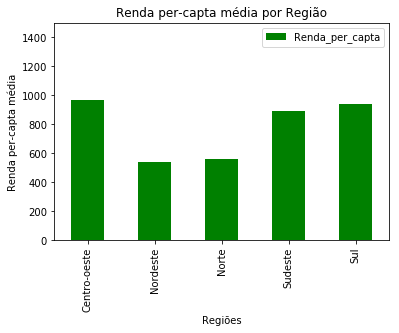

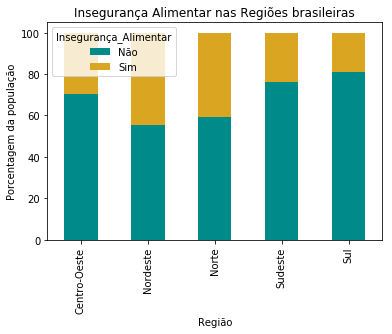

In [10]:
#Criando paramentros para um gráfico de renda média de cada região por região
médias = [renda_centro_oeste09, renda_nordeste09 ,renda_norte09, renda_sudeste09, renda_sul09]

#Criando um gráfico com os valores absolutos de renda per-capta
x = pd.DataFrame({"Renda_per_capta": médias})
x = x.rename(index={0:"Centro-oeste", 1:"Nordeste", 2:"Norte",3:"Sudeste", 4:"Sul"})
x = x.plot(kind= "bar", color='green', title = "Renda per-capta média por Região")
x.set_xlabel("Regiões")
x.set_ylabel("Renda per-capta média")
plt.ylim(0,1500)

#resumo análise por região
tabela1 = (pd.crosstab((colunas1.Região),(colunas1.Insegurança_Alimentar), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="Insegurança Alimentar nas Regiões brasileiras", color =["darkcyan", "goldenrod"]).set_ylabel("Porcentagem da população")

A partir da comparação destes dois gráficos, é possível reparar que, como o esperado, conforme a renda per-capta da região decresce, o índice de insegurança alimentar tenda a aumentar. A relação entre eles, entretanto, não é linear.
Existe, portanto outras variáveis influenciando na permanência da Insegurança Alimentar no Brasil. A análise e comparação dos seguintes gráficos pode esclarecer mais sobre esta relação:

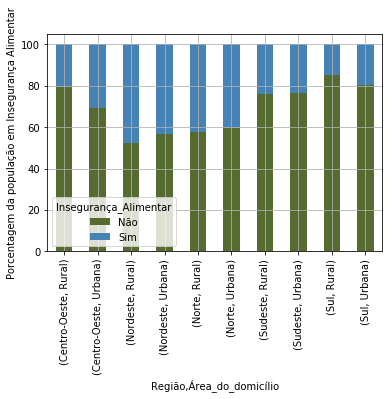

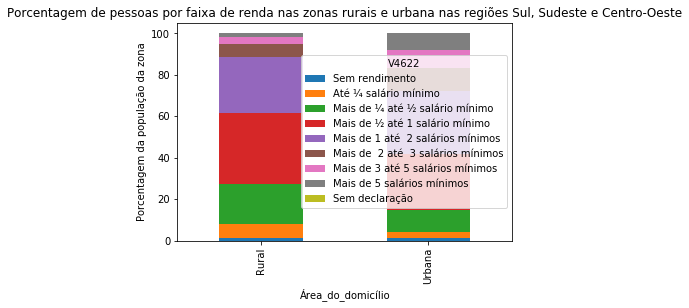

In [8]:
#relativização da análise por zona
tabela2 = (pd.crosstab([(dados09.Região),(dados09.Área_do_domicílio)], dados09.Insegurança_Alimentar, normalize="index")*100).plot(kind="bar", stacked = True, color = ["darkolivegreen", "steelblue"]).set_ylabel("Porcentagem da população em Insegurança Alimentar")
plt.grid(True)
tabela2

#renda nas zonas do centro-oeste, sul e sudeste
s = colunas1[(colunas1.Região == "Centro-Oeste") | (colunas1.Região == "Sul") | (colunas1.Região == "Sudeste")]
a = (pd.crosstab((s.Área_do_domicílio), dados09.V4622, normalize = "index")*100).plot(kind="bar", stacked = True, title = "Porcentagem de pessoas por faixa de renda nas zonas rurais e urbana nas regiões Sul, Sudeste e Centro-Oeste")
a.set_ylabel("Porcentagem da população da zona")

A partir da análise do gráfico "Porcentagem de pessoas por faixa de renda nas zonas rurais e urbana no Brasil", e do gráfico "Porcentagem de pessoas por faixa de renda nas zonas rurais e urbana nas regiões Sul, Sudeste e Centro- Oeste",é possível perceber que, em geral, a população da zona urbana recebe uma renda mensal maior do que a população da zona rural. Mesmo assim, na região Centro-Oeste, Sudeste e Sul a população que possui maior índice de insegurança alimentar é a população urbana (Gráfico 1). A partir destes dados, pode-se concluir que a renda não é a única variável influenciadora no índice de insegurança alimentar.

# 5.0 Conclusões e Considerações finais

A partir da análise dos dados trazidos por este projeto, uma resposta para a pergunta: "A renda média per-capta é a variável responsável pela Insegurança Alimentar no Brasil?" foi formulada. Os dados indicam que, apesar da correlação muito grande entre a variável renda e o índice de insegurança alimentar, outros fatores devem influenciar na constituição deste índice. É necessário lembrar que o projeto aqui desenvolvido foi baseado em modelo, que como qualquer outro, possui suas limitações. Um exemplo de limitação do modelo utilizado foi considerar apenas as médias das rendas per-captas nas regiões e zonas. Tal limitação pode ser fácilmente entendida com a interpretação do seguinte gráfico:

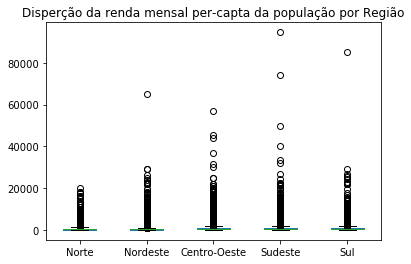

In [12]:
a10=pd.DataFrame([colunas1[colunas1.Região=="Norte"].Renda, colunas1[colunas1.Região=="Nordeste"].Renda, colunas1[colunas1.Região=="Centro-Oeste"].Renda, colunas1[colunas1.Região=="Sudeste"].Renda, colunas1[colunas1.Região=="Sul"].Renda],index=('Norte','Nordeste','Centro-Oeste','Sudeste','Sul'))
a10=a10.T
a10.plot.box()
plt.title("Disperção da renda mensal per-capta da população por Região")

Analisando o gráfico, é possível perceber que existem rendas que fogem exessivamente da média, e portanto com certeza geram distorções na média.